# Data Analysis and Visualization

This phase aims to analyze and visualize the data to provide meaningful insights.

### Objectives
1. Perform basic analysis
2. Perform exploratory data analysis
3. Perform classical analysis
4. Perform regression analysis

In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install squarify

In [3]:
import squarify

In [4]:
data = pd.read_csv('../Data/train.csv')
data.shape

(381109, 12)

The data contains `381109` rows and `12` columns

In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


**Observations**

- There are no missing values in the dataset

In [60]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
license_dict = {0: "No License", 1: "Has License"}
insured_dict = {0: "No", 1: "Yes"}
response_dict = {0: "Not interested", 1: "Interested"}

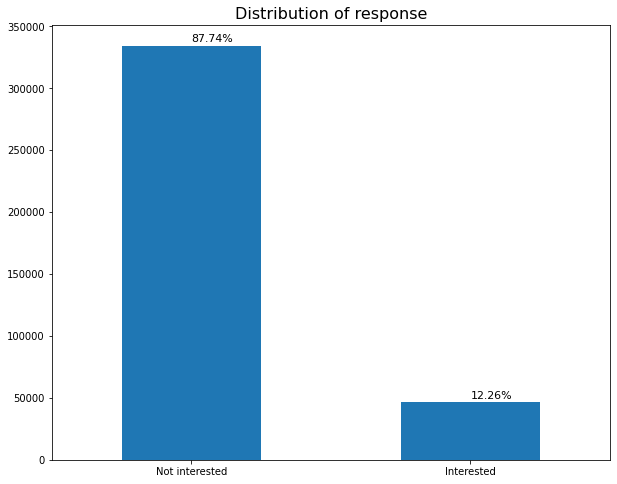

In [8]:
# visualization for distribution of the reponse
labels_pct = (data['Response'].value_counts(normalize=True) * 100).tolist() # normalize the value counts to percentage
labels = data['Response'].value_counts().tolist()

labels_dict = {'Interested': str(round(labels_pct[0],2)) + '%',
               'Not Interested': str(round(labels_pct[1], 2)) + '%'
              }

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data['Response'].value_counts().plot(kind='bar')
plt.text(0, labels[0] + 3000, labels_dict['Interested'], fontsize=11)
plt.text(1, labels[1] + 3000, labels_dict['Not Interested'], fontsize=11)
ax.set_xticklabels([response_dict[0], response_dict[1]])
plt.xticks(rotation=0)
plt.title('Distribution of response', fontsize=16)
fig.savefig('plots/response_distr.jpeg', dpi=82)
plt.show()

**Observation**
- The dataset is imbalanced, only 12.26% of all `policy holders` that had a health insurance were interested in vehicle insurance.

In [9]:
contigency_pct = pd.crosstab(data['Response'], data['Vehicle_Damage'])
contigency_pct

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


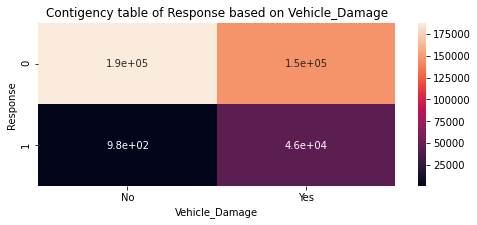

In [10]:
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Response based on Vehicle_Damage')
sns.heatmap(contigency_pct, annot=True)
plt.show()

In [11]:
label = data.groupby('Vehicle_Damage')['Response'].sum().index.get_level_values(0).tolist()
totals = data.groupby('Vehicle_Damage')['Response'].count().reset_index().Response.values.tolist()
sizes = data.groupby('Vehicle_Damage')['Response'].sum().reset_index().Response.values.tolist()
sizes_pct = [size/total*100 for size, total in zip(sizes, totals)]
label_fmt = [f'{label} = {size_pct:.2f}%' for label, size_pct in zip(label, sizes_pct)]
color = ['green', 'blue']

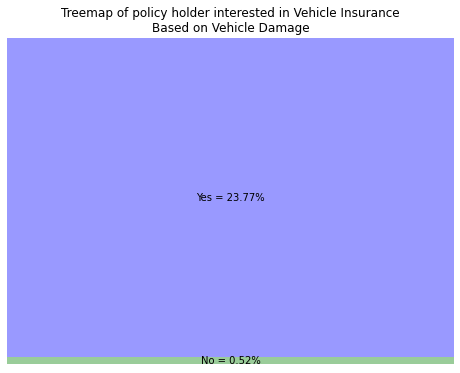

In [12]:
fig, ax = plt.subplots(1, figsize=(8, 6))

squarify.plot(sizes=sizes_pct, label=label_fmt, color=color, alpha=.4, pad=False)
plt.axis('off')
plt.title('Treemap of policy holder interested in Vehicle Insurance\nBased on Vehicle Damage', fontsize=12)
fig.savefig('plots/response_vehicle_dam.jpg', dpi=80)
plt.show()

We can clearly observe that the chances of requesting for a vehicle insurance increases when the policy holder have encountered a vehicle damage in the past

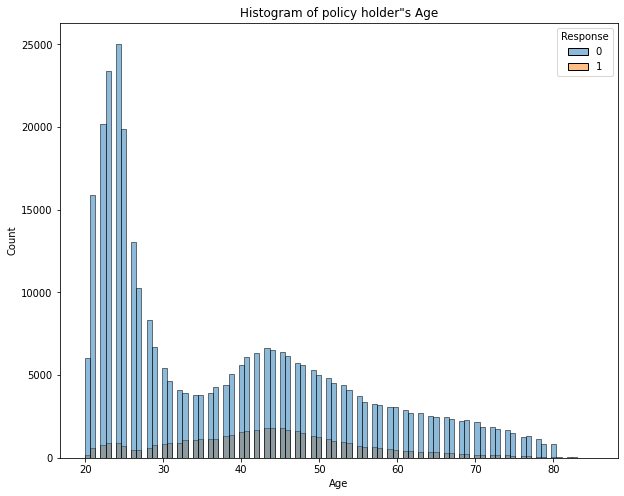

In [13]:
# histogram of age
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(x='Age', hue='Response', data=data, ax=ax)
plt.title('Histogram of policy holder"s Age')
fig.savefig('plots/age_dist.jpeg', dpi=82)
plt.show()

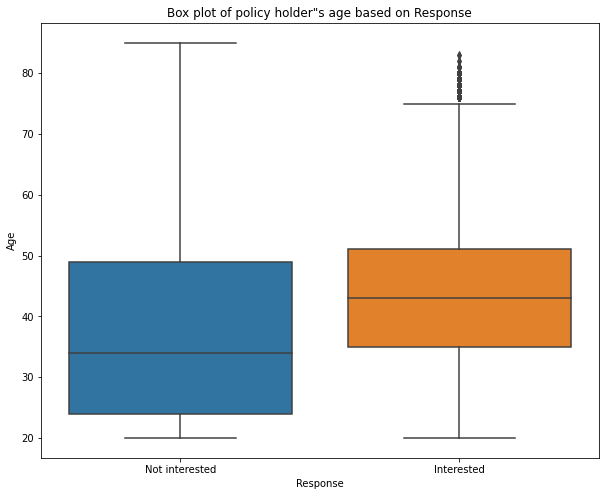

In [14]:
# histogram of age
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='Response', y='Age', data=data, ax=ax)
plt.title('Box plot of policy holder"s age based on Response')
ax.set_xticklabels(['Not interested', 'Interested'])
fig.savefig('plots/age_boxplot.jpg', dpi=82)
plt.show()

In [15]:
interested = data[data['Response'] == 1]
not_interested = data[data['Response'] == 0]

age_stat = pd.DataFrame(columns=['Interested', 'Not Interested'], index=['Mean', 'Median', 'Skew', 'Kurtosis'])
age_stat.loc['Mean', 'Interested'] = interested['Age'].mean()
age_stat.loc['Median', 'Interested'] = interested['Age'].median()
age_stat.loc['Skew', 'Interested'] = interested['Age'].skew()
age_stat.loc['Kurtosis', 'Interested'] = interested['Age'].kurtosis()

age_stat.loc['Mean', 'Not Interested'] = not_interested['Age'].mean()
age_stat.loc['Median', 'Not Interested'] = not_interested['Age'].median()
age_stat.loc['Skew', 'Not Interested'] = not_interested['Age'].skew()
age_stat.loc['Kurtosis', 'Not Interested'] = not_interested['Age'].kurtosis()

age_stat

,Interested,Not Interested
Mean,43.4356,38.1782
Median,43,34
Skew,0.32245,0.749026
Kurtosis,-0.0963024,-0.530315


**Observation**
1. The distribution of policy holders that are interested in vehicle insurance approximates a normal distribution
2. Age 40 - 50 are more likely to be interested in vehicle insurance
3. Age 20 - 34 are less likely to be interested in vehicle insurance
4. The distribution of policy holders that are not interested in vehicle insurance shows a bit of skewness
5. The median age of policy holders that are interested in vehicle insurance is 43 while the median age of policy holders that are not interested in vehicle insurance is 34

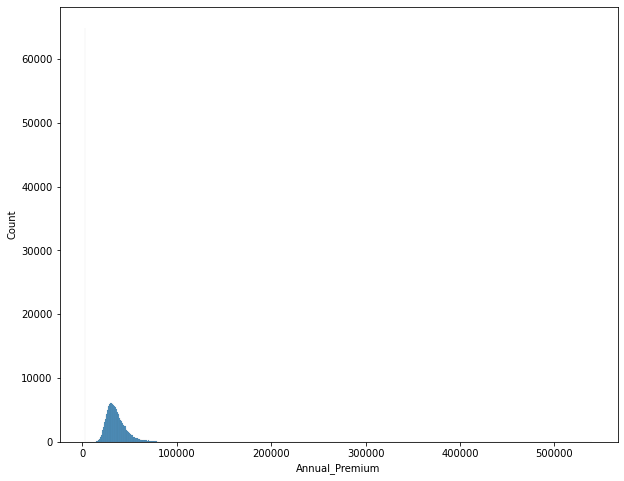

In [17]:
# histogram of age
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(x='Annual_Premium', data=data, ax=ax)
plt.show()

In [28]:
mask_2630 = data['Annual_Premium'] == 2630
data[mask_2630].shape[0] / data.shape[0] * 100

17.023213831213642

In [44]:
response_rate1 = data[mask_2630]['Response'].value_counts(normalize=True)[1]

In [39]:
mask_g2630l100000 = (data['Annual_Premium'] > 2630) & (data['Annual_Premium'] < 100000)
data[mask_g2630l100000].shape[0] / data.shape[0] * 100

82.77264509628479

In [55]:
response_rate2 = data[mask_g2630l100000]['Response'].value_counts(normalize=True)[1]

In [47]:
mask_g100000 = data['Annual_Premium'] >= 100000
data[mask_g100000].shape[0] / data.shape[0] * 100

0.20414107250156777

In [48]:
response_rate3 = data[mask_g100000]['Response'].value_counts(normalize=True)[1]

In [59]:
temp_df = pd.DataFrame(columns=['Annual_Premium Response Rate(%)'], index=['= 2630', '> 2630 and < 100000', '>= 100000'])
temp_df.loc['= 2630', 'Annual_Premium Response Rate(%)'] = response_rate1 * 100
temp_df.loc['> 2630 and < 100000', 'Annual_Premium Response Rate(%)'] = response_rate2 * 100
temp_df.loc['>= 100000', 'Annual_Premium Response Rate(%)'] = response_rate3 * 100
temp_df

,Annual_Premium Response Rate(%)
= 2630,13.1094
> 2630 and < 100000,12.0721
>= 100000,15.8098


**Observations**
1. 17% of the data have an annual_premium amount of 2630.0
2. 82% of the data have an annual_premium amount greater than 2630 and less than 100000
3. 20% of the data have an annual_premium amount greater than or equal to 100000
4. We can clearly observe that the response rate of policy holders that have an annual premium fee of 2630 is 13.10% which is 0.84% more than the expected response rate total of 12.26%
5. We can clearly observe that the response rate of policy holders that have an annual premium fee of > 2630 and < 100000 is 12.07% which is 0.19% less than the expected response rate total of 12.26%
6. We can clearly observe that the response rate of policy holders that have an annual premium fee of >= 100000 is 15.81% which is 3.55% more than the expected response rate total of 12.26%

> We conclude that on average the likelihood that a policy holder that has a health insurance would be interested in a vehicle insurance increases by 3.55% if the policy holders needs to pay an annual premium greater than 100000.

